# Continuous Run 

This notebook reviews the ```slurm-#######_#.out``` files that are generated when running ```continuousrun.sb```.  Specificall this file parses specific lines in the output file. These include the following examples. The first describes the setup of the run:

```Namespace(input_file='./see-segment/Image_data/Examples/Mushrooms.jpeg', input_mask='./see-segment/Image_data/Examples/Mushrooms_GT.png', seed=64467698, pop_size=10, num_iter=10)```

The others describe each generation's best so far.

```#BEST [0.9278057254150632,  ['XYZ', True, 2, 'Felzenszwalb', 0.9296875, 0.76953125, 0.46875, 0.53125, 0.1953125, 0.3125, 7, 17]]```


In [1]:
import pandas as pd
import matplotlib.pylab as plt
from pathlib import Path
import re

In [2]:
slurmoutdir = Path('.')

slurmfiles = slurmoutdir.glob('./Stopat100/*.out')

filelist = []

for file in slurmfiles:
    jobnum = re.findall('-[0-9]*_', str(file))[0][1:-1]
    array = re.findall('_[0-9]*\.', str(file))[0][1:-1]
    item = [str(file), int(jobnum), int(array)]
    filelist.append(item)

df = pd.DataFrame(filelist, columns=['filename', 'jobid', 'arrayid'])
df = df.sort_values(by=['arrayid', 'jobid'])

In [3]:
def Namespace(input_file='', input_mask='', seed=60, pop_size=0, num_iter=0):
    ns = {}
    ns['input_file'] = input_file;
    ns['input_mask'] = input_mask;   
    ns['seed'] = seed;
    ns['pop_size'] = pop_size;
    ns['num_iter'] = num_iter
    #print(ns)
    return ns

In [4]:
def parseoutput(filename):
    bestsofar = []
    stats = {}
    with open(filename, "r") as f:
        for line in f:
            if 'BEST' in line:
                vecstr = line[6:]
                x = eval(vecstr)
                bestsofar.append(x)
            if 'Namespace' in line:
                data = line[10:-2].split(',')
                for item in data:
                    name,value = item.strip().split('=')
                    stats[name]=value               

    return bestsofar, stats
    

In [5]:
examples = {}
iterations = {}
rundata = {}
for index, row in df.iterrows():
    bestsofar, stats = parseoutput(row['filename'])
    print(f"{row['filename']} - {len(bestsofar)}")
    if not row['arrayid'] in examples:
        examples[row['arrayid']] = bestsofar
        iterations[row['arrayid']] = [ len(examples[row['arrayid']]) ]
        rundata[row['arrayid']] = stats
    else:
        
        examples[row['arrayid']] = examples[row['arrayid']] + bestsofar
        iterations[row['arrayid']].append(len(examples[row['arrayid']]))
        if rundata[row['arrayid']] == None:
            rundata[row['arrayid']] = stats
    
for arrayid in rundata:
    rundata[arrayid]['iterations'] = iterations[arrayid]
    print(f"{sum(iterations[arrayid])} =?= {len(examples[arrayid])}")
    rundata[arrayid]['data'] = examples[arrayid]

Stopat100/slurm-64467574_1.out - 20
Stopat100/slurm-64497014_1.out - 20
Stopat100/slurm-64518125_1.out - 20
Stopat100/slurm-64541932_1.out - 20
Stopat100/slurm-64574525_1.out - 20
Stopat100/slurm-64605386_1.out - 0
Stopat100/slurm-64637492_1.out - 0
Stopat100/slurm-64678345_1.out - 0
Stopat100/slurm-64724615_1.out - 0
Stopat100/slurm-64786944_1.out - 0
Stopat100/slurm-64829138_1.out - 0
Stopat100/slurm-64886028_1.out - 0
Stopat100/slurm-64932231_1.out - 0
Stopat100/slurm-64979987_1.out - 0
Stopat100/slurm-64467574_2.out - 6
Stopat100/slurm-64497014_2.out - 4
Stopat100/slurm-64518132_2.out - 20
Stopat100/slurm-64541946_2.out - 20
Stopat100/slurm-64574526_2.out - 4
Stopat100/slurm-64605874_2.out - 0
Stopat100/slurm-64638614_2.out - 0
Stopat100/slurm-64680895_2.out - 0
Stopat100/slurm-64726802_2.out - 0
Stopat100/slurm-64787940_2.out - 0
Stopat100/slurm-64830352_2.out - 0
Stopat100/slurm-64886991_2.out - 0
Stopat100/slurm-64940350_2.out - 0
Stopat100/slurm-64981447_2.out - 0
Stopat100/slu

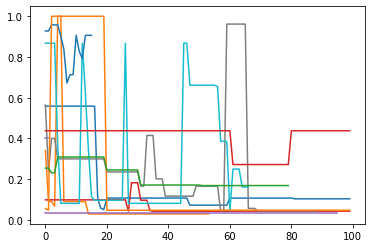

In [6]:
for arrayid in examples:
    results = pd.DataFrame(rundata[arrayid]['data'], columns=['fitness', 'individual'])
    plt.plot(results['fitness'])

In [7]:
import math
def plottrend(trend, steps):
    mx = max(trend)
    mn = min(trend)
    plt.plot(trend, 'b')
    for step in steps:
        plt.plot([step, step], [mn, mx], 'r')

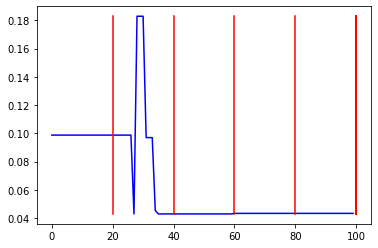

In [8]:
item = 4
results = pd.DataFrame(rundata[item]['data'], columns=['fitness', 'individual'])
trend = list(results['fitness']);
plottrend(trend, iterations[item])

In [9]:
item

4